In [24]:
import numpy as np
from random import uniform
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt

In [25]:
def generate_time_series_data(n):
    return np.sin(n + np.sin(n)**2)

input_samples = []
output_labels = []

input_range = 10 #pra cada ponto, olharemos 10 pontos antes 
step_size = 0.3
for n in range(0, 1000):
    input_data = []
    output_data = []
    for x in np.arange(n - input_range, n, step_size):
        input_data.append(generate_time_series_data(x))
    input_samples.append(input_data)
    for y in np.arange(n, n + 3, step_size):
        output_data.append(generate_time_series_data(y))
    output_labels.append(output_data)


In [26]:
input_samples = np.array(input_samples)
output_labels = np.array(output_labels)

In [27]:
train_input, test_input, train_output, test_output = train_test_split(input_samples, output_labels, test_size=0.2, random_state=33)
print(train_input.shape)
print(train_output.shape)

(800, 34)
(800, 10)


In [28]:
neural_network_model = Sequential([
    Dense(units=5, input_shape=(34,), activation='relu'),   
    Dense(units=10, activation='linear'),
])

In [29]:
neural_network_model.compile(optimizer=Adam(learning_rate=0.1), loss='mean_squared_error', metrics=['mean_absolute_error'])

In [30]:
training_result = neural_network_model.fit(x=train_input, y=train_output, validation_split=0.2, batch_size=50, epochs=100, shuffle=True, verbose=2)

Epoch 1/100
13/13 - 1s - loss: 0.2236 - mean_absolute_error: 0.3657 - val_loss: 0.0993 - val_mean_absolute_error: 0.2606 - 608ms/epoch - 47ms/step
Epoch 2/100
13/13 - 0s - loss: 0.0736 - mean_absolute_error: 0.2152 - val_loss: 0.0519 - val_mean_absolute_error: 0.1861 - 55ms/epoch - 4ms/step
Epoch 3/100
13/13 - 0s - loss: 0.0436 - mean_absolute_error: 0.1680 - val_loss: 0.0393 - val_mean_absolute_error: 0.1610 - 57ms/epoch - 4ms/step
Epoch 4/100
13/13 - 0s - loss: 0.0315 - mean_absolute_error: 0.1448 - val_loss: 0.0280 - val_mean_absolute_error: 0.1367 - 50ms/epoch - 4ms/step
Epoch 5/100
13/13 - 0s - loss: 0.0212 - mean_absolute_error: 0.1162 - val_loss: 0.0192 - val_mean_absolute_error: 0.1089 - 56ms/epoch - 4ms/step
Epoch 6/100
13/13 - 0s - loss: 0.0153 - mean_absolute_error: 0.0987 - val_loss: 0.0152 - val_mean_absolute_error: 0.0984 - 55ms/epoch - 4ms/step
Epoch 7/100
13/13 - 0s - loss: 0.0128 - mean_absolute_error: 0.0882 - val_loss: 0.0123 - val_mean_absolute_error: 0.0862 - 53ms/

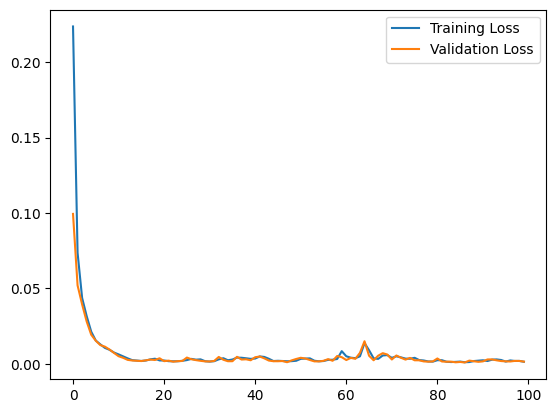

In [31]:
plt.plot(training_result.history['loss'], label='Training Loss')
plt.plot(training_result.history['val_loss'], label='Validation Loss')
plt.legend()

In [32]:
test_predictions = neural_network_model.predict(test_input)

7/7 [==============================] - 0s 1ms/step


In [33]:
mae = mean_absolute_error(test_output, test_predictions)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 0.029414721486152436


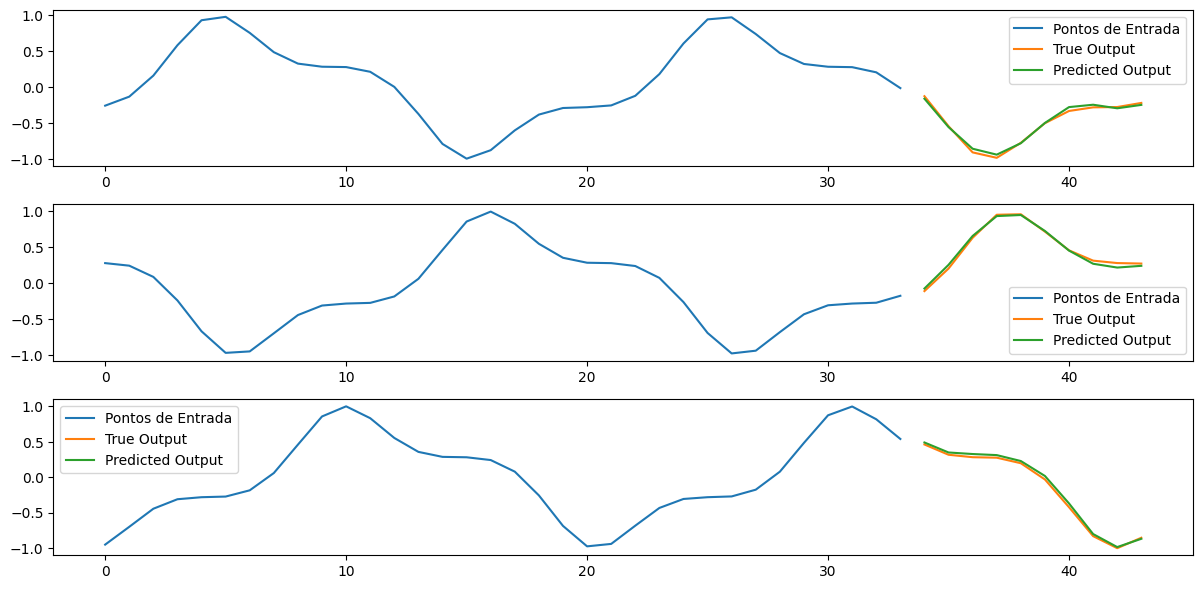

In [36]:
plt.figure(figsize=(12, 6))

# Passo 1
plt.subplot(3, 1, 1)
plt.plot(range(len(test_input[0])), test_input[0], label='Pontos de Entrada')
plt.plot(range(len(test_input[0]), len(test_input[0]) + len(test_output[0])), test_output[0], label='True Output')
plt.plot(range(len(test_input[0]), len(test_input[0]) + len(test_output[0])), test_predictions[0], label='Predicted Output')
plt.legend()

# Passo 2
plt.subplot(3, 1, 2)
plt.plot(range(len(test_input[1])), test_input[1], label='Pontos de Entrada')
plt.plot(range(len(test_input[1]), len(test_input[1]) + len(test_output[1])), test_output[1], label='True Output')
plt.plot(range(len(test_input[1]), len(test_input[1]) + len(test_output[1])), test_predictions[1], label='Predicted Output')
plt.legend()

# Passo 3
plt.subplot(3, 1, 3)
plt.plot(range(len(test_input[2])), test_input[2], label='Pontos de Entrada')
plt.plot(range(len(test_input[2]), len(test_input[2]) + len(test_output[2])), test_output[2], label='True Output')
plt.plot(range(len(test_input[2]), len(test_input[2]) + len(test_output[2])), test_predictions[2], label='Predicted Output')
plt.legend()

plt.tight_layout()
plt.show()